# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)

# Revision exercises

## Question 1

Below is a extract of shot data from a seismic survey.

|  Time (ms)  |  Shot  |
|-----|-----|
| 0 | -0.021373 |
| 4 | -0.024578 |
| 8 | -0.023914 |
| 12 | -0.018227 |
| 16 | -0.00781 |
| 20 | 0.005602 |
| 24 | 0.019264 |
| 28 | 0.030235 |
| 32 | 0.036059 |
| 36 | 0.035334 |

 1. Calculate the Lagrange polynomial for these points. Plot both the Lagrange polynomial and the raw data points.
 2. The full shot is available in the file [shot.txt](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/data/shot.txt) - where the sample interval is 4ms as above. Note that the file only contains one column as you can calculate the time column yourself. Use cubic-polynomial splines to re-interpolate the data for a sample interval of 7.07ms. Plot both the original shot data and the interpolated time series.

Populating the interactive namespace from numpy and matplotlib


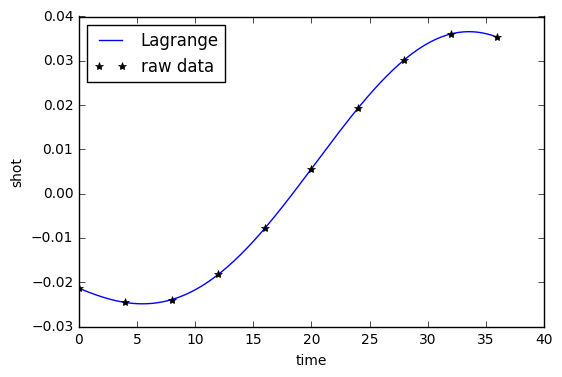

In [2]:
import numpy as np
import scipy.interpolate
%pylab inline

time = [0,4,8,12,16,20,24,28,32,36]
shot = [-0.021373, -0.024578, -0.023914, -0.018227, -0.00781, 0.005602, 0.019264, 0.030235, 0.036059, 0.035334]

# Create the Lagrange polynomial for the given points.
lp = scipy.interpolate.lagrange(time, shot)

# Evaluate this fuction at a high resolution so that we can get a smooth plot. 
time2 = numpy.linspace(0, 36, 200)
pylab.plot(time2, lp(time2), 'b', label='Lagrange')

# Overlay raw data
pylab.plot(time, shot, 'k*', label='raw data')

# Add a legend
pylab.xlabel('time')
pylab.ylabel('shot')
pylab.legend(loc='best')

pylab.show()

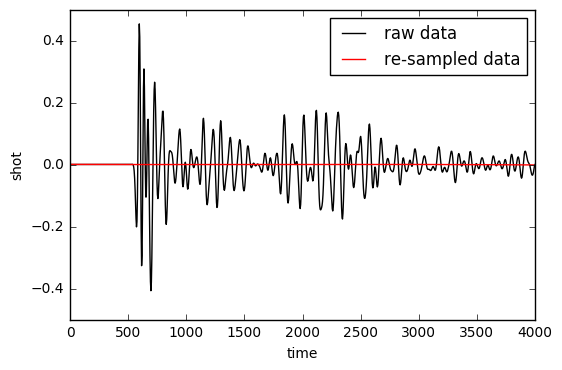

In [3]:
# Get original data
infile = open("data/shot.txt", "r")

shot = []
for line in infile:
    shot.append(float(line))
time = range(0, 4*len(shot), 4)

# Interpolate data with cubic polynomials
poly_coeffs = np.polyfit(time, shot, 3)
poly = np.poly1d(poly_coeffs)

# sample the new interpolated polynomial with an interval of 7.07
time2 = [x * 7.07 for x in range(int(time[-1]/7.07))]
shot2 = poly(time2)

# Plot both series
pylab.plot(time, shot, 'k', label='raw data')
pylab.plot(time2, shot2, 'r', label='re-sampled data')

pylab.xlabel('time')
pylab.ylabel('shot')
pylab.legend(loc='best')

pylab.show()


## Question 2

1. Calculate the upper triangular form for the matrix:
\begin{align*}
A = \begin{bmatrix}
−5 &  3 &  4\\
10 & −8 & −9\\
15 &  1 &  2
\end{bmatrix}
\end{align*}

2. Consider the matrix:
\begin{align*}
C = \begin{bmatrix}
−5 &  3 &  4\\
10 & −8 & −9\\
15 &  1 &  2
\end{bmatrix}
\end{align*}
Does matrix $C$ have an inverse? If not, then why not? 

In [31]:
from pprint import pprint
import numpy.linalg as la

# Compute the upper triangular matrix by Gaussian elimination
def upper_triangle(A):
    # Assuming it is a square matrix of size nxn.
    n,m = A.shape
    if n != m:
        raise("Error, matric should be square")
        
    # Create a local copy to avoid modifying input matrix
    A = A.copy()
    
    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i,k]/A[k,k])
            # we don't start the following loop from 0 as we can assume
            # some entries in the rows are already zero
            for j in range(k, n): 
                A[i,j] = A[i,j] - s*A[k,j]
                
    return A

A = np.array([[-5,3,4], [10,-8,-9], [15,1,2]])
U = upper_triangle(A)
pprint(U)

array([[-5,  3,  4],
       [ 0, -2, -1],
       [ 0,  0,  9]])


In [32]:
C = np.array([[-5,3,4], [10,-8,-9], [15,1,2]])
if not np.isclose(np.linalg.det(C), 0):
    print "The determinant of C is non null, so C has a unique inverse."
else :
    print "The determinant of C is null, so C cannot be inverted."

The determinant of C is non null, so C has a unique inverse.


## Question 3

Consider the function
$$f(x) = \dfrac{1}{(x − 0.3)^2 + 0.01} - \dfrac{1}{(x − 0.8)^2 + 0.04}$$.


 1. Write a function that computes the second derivative of $f(x)$ using central differencing. The interface to your function should look like *central_diff2(f, x, h)* where $f$ is the function to be differentiated, $x$ is the position at which the derivative should be estimated, and $h (= \Delta x)$ is the step size.
 2. Use this function to compute the derivative at $x = 0.5$ for decreasing values of $\Delta x$. Start with $\Delta x=1.2$ and keep halving until the relative difference between solutions falls below $1.0^{-6}$ Plot the convergence of the method, i.e. plot $\Delta x$ against the absolute difference between the analytical value and the finite difference approximation.

In [35]:
def central_diff2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

We have $$f'(x) = \frac{-2(x-0.3)}{((x − 0.3)^2 + 0.01)^2} + \frac{2(x-0.8)}{((x − 0.8)^2 + 0.04)^2}\,.$$

There are two errors involved in this exercise: 
 - the relative error between two successive approximations is used as a criterion to stop the loop: $\left|\frac{f'_{approx, dx}-f'_{approx, dx/2}}{f'_{approx, dx}}\right|$
 - the error with respect to the exact value is stored to plot the convergence: $\left|f'_{approx, dx}-f'_{exact}\right|$
 
Note that as the discretisation interval tends to 0, the approximate value of the derivative tends to the exact value, and thus both errors become very similar. This means that in a real problem where you cannot compute the exact value, using the difference between the last two values is a good indicator for the convergence.

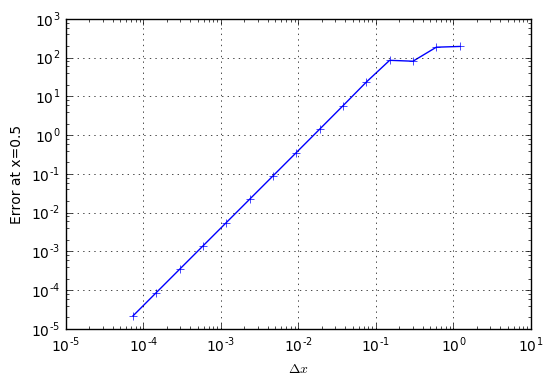

In [47]:
def f(x):
    a = (x-0.3)*(x-0.3) + 0.01
    b = (x-0.8)*(x-0.8) + 0.04
    return 1./a - 1./b

def f_prime(x):
    a = -2*(x-0.3)
    b = (x-0.3)*(x-0.3) + 0.01
    c = 2*(x-0.8)
    d = (x-0.8)*(x-0.8) + 0.04
    return a/(b*b) + c/(d*d)

x = 0.5

diff_exact = f_prime(x)

delta_x = [] # contains the delta_x
error = []   # contains the error between the analytical and the approximate values
dx = 1.2
diff_prev = 1000. # we store the previous approximate derivative to compute the relative error
error_rel = 1000. # relative error that is used as criteria to stop our loop

# let us stop after 100 iterations for security
for i in range(100) : 
    diff = central_diff2(f, x, dx)
    delta_x.append(dx)
    error.append(abs(diff-diff_exact))
    error_rel = abs((diff - diff_prev)/diff_prev)
    if error_rel < 1.e-6:
        break
    diff_prev = diff
    dx *= 0.5
    
pylab.loglog(delta_x, error, '+-')
pylab.xlabel('$\Delta x$');pylab.ylabel('Error at x=0.5');pylab.grid(True);pylab.legend(loc='best')
pylab.show()

## Question 4

Consider the integral:
$$\int_0^{2\pi} x^2 \cos(x) dx.$$

Show how the absolute error between the exact solution and the numerical solution varies with the size of the integration step for the four numerical integration methods: trapezoid rule; Simpson's rule; composite Simpson's rule; and Weddle's rule. Show your result by plotting error against integration step, $dx$.

Two successive integrations by parts give the exact integral:

$$
\begin{aligned}
\int_0^{2\pi} x^2 \cos(x) dx & =  \left[x^2 \sin(x) \right]_0^{2\pi} - \int_0^{2\pi} 2 x \sin(x) dx \\
                             & =  \int_0^{2\pi} 2 x (-\sin(x)) dx \\
                             & = \left[2 x \cos(x) \right]_0^{2\pi} - \int_0^{2\pi} 2 \cos(x) dx \\
                             & = 4 \pi - \left[2 \sin(x) \right]_0^{2\pi} \\
                             & = 4 \pi
\end{aligned}$$

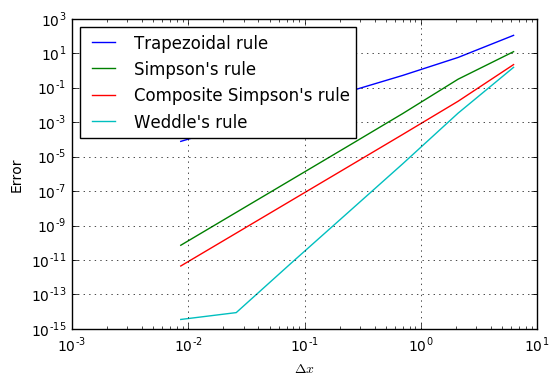

In [58]:
from math import pi, cos

def trapezoid_rule(start_point, end_point, f, number_of_bins):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    running_total = 0.
    # Loop to create each trapezoid 
    for i in range(number_of_bins): # note this function takes a slightly different approach to achieve the same thing as above
        # Set the start of this bin
        bin_start = start_point + (bin_size * i)
        # Find the area of the current trapezoid and add it to the running total
        running_total += bin_size*float( f(bin_start)+f(bin_start+bin_size) )/2.0
        
    return running_total


def simpsons_rule(start_point, end_point, f, number_of_bins):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    running_total = 0.
    for i in range(number_of_bins):
        bin_start = start_point + bin_size * (i)
        bin_mid = bin_start + bin_size/2
        bin_end = bin_start + bin_size
        running_total += (bin_size/6)*float(f(bin_start)+4*f(bin_mid)+f(bin_end))
        
    return running_total


def simpsons_composite_rule(start_point, end_point, f, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins

    running_total = 0.
    for i in range(number_of_bins):
        bin_start = start_point + bin_size * (i)
        bin_quarter = bin_start + bin_size*1./4
        bin_mid = bin_start + bin_size*2./4
        bin_three_quarter = bin_start + bin_size*3./4
        bin_end = bin_start + bin_size
        running_total += (bin_size/12)*float(f(bin_start)+4*f(bin_quarter)
                                             +2*f(bin_mid)+4*f(bin_three_quarter)
                                             +f(bin_end))
        
    return running_total


def weddles_rule(start_point, end_point, f, number_of_bins=10):
    result_simpson = simpsons_rule(start_point, end_point, f, number_of_bins)
    result_composite = simpsons_composite_rule(start_point, end_point, f, number_of_bins)
    
    return result_composite + float(result_composite - result_simpson)/15


def f(x):
    return x*x*cos(x)

int_exact = 4*pi
start_point = 0.
end_point = 2*pi

dx = []
err_tra = []
err_sim = []
err_sic = []
err_wed = []

number_of_bins = 1

while number_of_bins < 1e3:
    
    int_tra = trapezoid_rule(start_point, end_point, f, number_of_bins)
    int_sim = simpsons_rule(start_point, end_point, f, number_of_bins)
    int_sic = simpsons_composite_rule(start_point, end_point, f, number_of_bins)
    int_wed = weddles_rule(start_point, end_point, f, number_of_bins)
    
    err_tra_cur = abs(int_tra - int_exact)
    err_sim_cur = abs(int_sim - int_exact)
    err_sic_cur = abs(int_sic - int_exact)
    err_wed_cur = abs(int_wed - int_exact)
    
    err_tra.append(err_tra_cur)
    err_sim.append(err_sim_cur)
    err_sic.append(err_sic_cur)
    err_wed.append(err_wed_cur)
    
    dx.append((end_point-start_point)/number_of_bins)
    
    number_of_bins *= 3

    
pylab.loglog(dx, err_tra, label = "Trapezoidal rule")
pylab.loglog(dx, err_sim, label = "Simpson's rule")
pylab.loglog(dx, err_sic, label = "Composite Simpson's rule")
pylab.loglog(dx, err_wed, label = "Weddle's rule")
pylab.xlabel('$\Delta x$');pylab.ylabel('Error');pylab.grid(True);pylab.legend(loc='best')
pylab.show()
